In [255]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge#for using linear regrassion
from sklearn.metrics import confusion_matrix , accuracy_score,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [256]:
data = pd.read_csv("data 1.csv")

In [257]:
#now testing with train test spilit method

#ml me agar X,y hai to us ka matlab hai matix agar x,y hai to us ka matlab ahi vector
from sklearn.model_selection import train_test_split

X = data[["Open","High","vol","Low"]]#independent
y = data[["Close"]]#dependent

#______________cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03,shuffle=False,random_state=10)#(X label data, y label data , % of testing data ,)
#agar hame train ke liya % me data dena hai to train_size ka use kerange


In [277]:
#ridge and lasso regresion training and fitting
model = LinearRegression()
model.fit(X_train,y_train)
model_score = model.score(X_test,y_test)
pre = model.predict(X_test)

model_lasso = Lasso(alpha = 5005)#by default alpha is 1 so ihave put alpha = 5005 as it give best result in it
model_lasso.fit(X_train,y_train)
model_lasso_pre = model_lasso.predict(X_test)
model_lasso_score = model_lasso.score(X_test, y_test)

model_ridge = Ridge(alpha = 400000)#by default alpha is 1 so ihave put alpha = 400000 as it give best result in it
model_ridge.fit(X_train,y_train)
model_ridge_pre = model_ridge.predict(X_test)
model_ridge_score = model_ridge.score(X_test, y_test)

In [278]:
#    now cheking with poly nomiyal linera regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

 
poly_reg = PolynomialFeatures(degree=1)
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)

lr = LinearRegression() 
lr.fit(X_train_poly, y_train) 
lr.score(X_test_poly, y_test,)
prepl = lr.predict(X_test_poly)
prepl,y_test

(array([[16609.17425429],
        [16908.03874263],
        [17113.50252866],
        [17276.45808615],
        [17309.2593618 ],
        [17306.45848028],
        [17252.06008905]]),
         Close
 225  16641.80
 226  16929.60
 227  17158.25
 228  17340.05
 229  17345.45
 230  17388.15
 231  17382.00)

In [279]:
#rms jada error = under fit   0 error = over fit

mselr = mean_squared_error(y_test,pre)
rmslr = np.sqrt(mse)

msels = mean_squared_error(y_test,model_lasso_pre)
rmsls = np.sqrt(mse)

mserg = mean_squared_error(y_test,model_ridge_pre)
rmsrg = np.sqrt(mse)

msepr = mean_squared_error(y_test, pre)
rmsepr = np.sqrt(mse)


print(f"mse\nmselr={mselr}  msels={msels}   mserg={mserg}\n  msepr={msepr}")
print(f"rmse\nrmslr={rmslr}  rmsls={rmsls}   rmsrg={rmsrg}  rmsepr={rmsepr}")
print("\n\n")
print("scores are:-alpha=my \n",model_lasso_score,"===Lasso\n",model_ridge_score,"===ridge\n",model_score,"==Lr\n")
print("this are the max result we can made with this module")

mse
mselr=4634.74885018951  msels=4595.516215358072   mserg=4280.108302698535
  msepr=4634.74885018951
rmse
rmslr=68.07898977914402  rmsls=68.07898977914402   rmsrg=68.07898977914402  rmsepr=68.07898977914402



scores are:-alpha=my 
 0.9342364180120367 ===Lasso
 0.9387500250045476 ===ridge
 0.9336749841107225 ==Lr

this are the max result we can made with this module


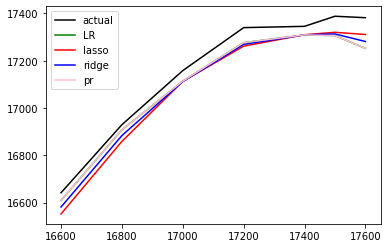

In [280]:
plt.plot([16600,16800,17000,17200,17400,17500,17600],y_test,label = "actual",color = "k")
plt.plot([16600,16800,17000,17200,17400,17500,17600],pre,color = "g",label = "LR")
plt.plot([16600,16800,17000,17200,17400,17500,17600],model_lasso_pre,label = "lasso",color = "r")
plt.plot([16600,16800,17000,17200,17400,17500,17600],model_ridge_pre,color = "b",label = "ridge")
plt.plot([16600,16800,17000,17200,17400,17500,17600],prepl,color = "pink",label = "pr")
plt.legend()